In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Nettoyage des données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Vérifie les doublons
df.duplicated().sum()

0

In [6]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [6]:
#valeurs uniques
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [5]:
df.select_dtypes(include=["number"])

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [6]:
# sélection des colonnes catégoriel
categoriel_col = df.select_dtypes(exclude=["number"]).columns
categoriel_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [7]:
# encodage des colonnes catégorielles
#categoriel_col = pd.DataFrame({'gender': ['male', 'female']})
categoriel_df = df[categoriel_col]
#df_encoded = pd.get_dummies(categoriel_df, columns=categoriel_col)
#df_encoded


encoder les colonnes catégoriels 

encodage one hot encoding

In [8]:
# one hot encoding pour la colonne gender et test preparation course
df = pd.get_dummies(df, columns=['gender', 'test preparation course'])
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,group B,bachelor's degree,standard,72,72,74,True,False,False,True
1,group C,some college,standard,69,90,88,True,False,True,False
2,group B,master's degree,standard,90,95,93,True,False,False,True
3,group A,associate's degree,free/reduced,47,57,44,False,True,False,True
4,group C,some college,standard,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,88,99,95,True,False,True,False
996,group C,high school,free/reduced,62,55,55,False,True,False,True
997,group C,high school,free/reduced,59,71,65,True,False,True,False
998,group D,some college,standard,68,78,77,True,False,True,False


Encodage ordinale

In [9]:
#encodage ordinal

encodage = OrdinalEncoder(categories=[["master's degree", "bachelor's degree", "some high school", "high school", "associate's degree", "some college"]])
encodage.fit(df[['parental level of education']])
df['parental level of education'] = encodage.transform(df[['parental level of education']])

Encodage de fréquence

In [10]:
# Encodage de fréquence
encodage_freq = df['race/ethnicity'].value_counts(normalize=True)

df['race/ethnicity'] = df['race/ethnicity'].map(encodage_freq)
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.190,1.0,standard,72,72,74,True,False,False,True
1,0.319,5.0,standard,69,90,88,True,False,True,False
2,0.190,0.0,standard,90,95,93,True,False,False,True
3,0.089,4.0,free/reduced,47,57,44,False,True,False,True
4,0.319,5.0,standard,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,0.140,0.0,standard,88,99,95,True,False,True,False
996,0.319,3.0,free/reduced,62,55,55,False,True,False,True
997,0.319,3.0,free/reduced,59,71,65,True,False,True,False
998,0.262,5.0,standard,68,78,77,True,False,True,False


Encodage de cible

In [11]:
# encodage de cible
df_encodage_cible = pd.DataFrame({'lunch': ['standard', 'free/reduced'], 'target': [0,1]})
mean_cb = df_encodage_cible.groupby('lunch')['target'].mean()
df['lunch'] = df['lunch'].map(mean_cb)
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.190,1.0,0.0,72,72,74,True,False,False,True
1,0.319,5.0,0.0,69,90,88,True,False,True,False
2,0.190,0.0,0.0,90,95,93,True,False,False,True
3,0.089,4.0,1.0,47,57,44,False,True,False,True
4,0.319,5.0,0.0,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,0.140,0.0,0.0,88,99,95,True,False,True,False
996,0.319,3.0,1.0,62,55,55,False,True,False,True
997,0.319,3.0,1.0,59,71,65,True,False,True,False
998,0.262,5.0,0.0,68,78,77,True,False,True,False


In [15]:
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.190,1.0,0.0,72,72,74,True,False,False,True
1,0.319,5.0,0.0,69,90,88,True,False,True,False
2,0.190,0.0,0.0,90,95,93,True,False,False,True
3,0.089,4.0,1.0,47,57,44,False,True,False,True
4,0.319,5.0,0.0,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,0.140,0.0,0.0,88,99,95,True,False,True,False
996,0.319,3.0,1.0,62,55,55,False,True,False,True
997,0.319,3.0,1.0,59,71,65,True,False,True,False
998,0.262,5.0,0.0,68,78,77,True,False,True,False


Normalisation des données

In [12]:
scaler = MinMaxScaler()

scaler.set_output(transform="pandas")

scaler.fit(df)

scaler.transform(df)

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.439130,0.2,0.0,0.72,0.662651,0.711111,1.0,0.0,0.0,1.0
1,1.000000,1.0,0.0,0.69,0.879518,0.866667,1.0,0.0,1.0,0.0
2,0.439130,0.0,0.0,0.90,0.939759,0.922222,1.0,0.0,0.0,1.0
3,0.000000,0.8,1.0,0.47,0.481928,0.377778,0.0,1.0,0.0,1.0
4,1.000000,1.0,0.0,0.76,0.734940,0.722222,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,0.221739,0.0,0.0,0.88,0.987952,0.944444,1.0,0.0,1.0,0.0
996,1.000000,0.6,1.0,0.62,0.457831,0.500000,0.0,1.0,0.0,1.0
997,1.000000,0.6,1.0,0.59,0.650602,0.611111,1.0,0.0,1.0,0.0
998,0.752174,1.0,0.0,0.68,0.734940,0.744444,1.0,0.0,1.0,0.0


Analyse exploratoire et visualisation

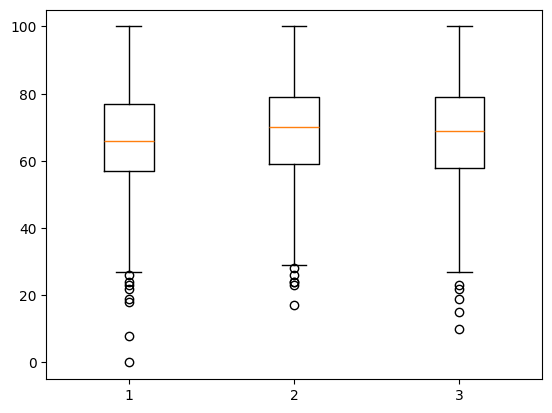

In [13]:
colonnes_a_tracer = ['math score', 'reading score', 'writing score']

plt.boxplot(df[colonnes_a_tracer])
plt.show()
# Il y a dans chacun à peu près le même nombre de valeurs abérantes

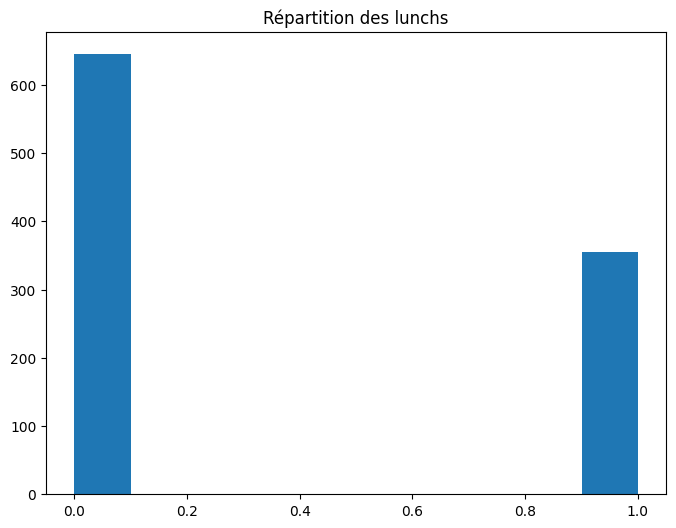

In [15]:
#histogramme pour représenter le pourcentage entre la colonne 'gender_male' et 'gender_female'

plt.figure(figsize=(8, 6))
plt.hist(df['lunch'])
plt.title('Répartition des lunchs')

plt.show()

Corrélations

<Axes: >

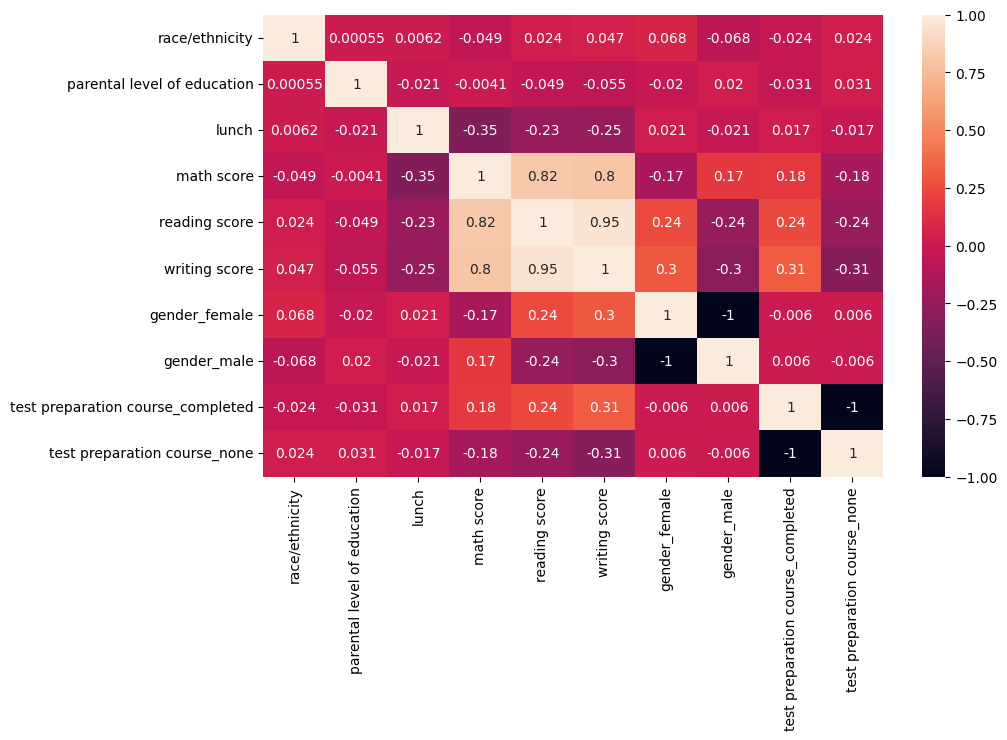

In [16]:
corr_matrix_pearson = df.corr()
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix_pearson, annot=True)

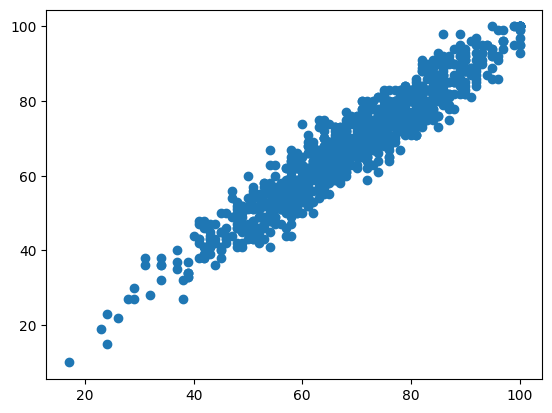

In [ ]:
# diagramme à bande
compte = df[]
plt.scatter(df['reading score'], df['writing score'])
plt.show()

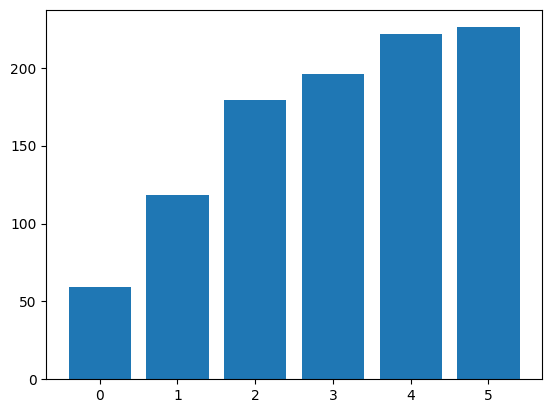

In [ ]:
#histogramme pour la colonne 'parental level of education'
compte = df['parental level of education'].value_counts()
plt.bar(compte.index, compte.values)
plt.show()